In [47]:
import seaborn as sns
import pandas as pd
from pathlib import Path
import sys
from logging import basicConfig, INFO
import ray
import pickle
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

from simulation import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Testing

In [64]:
alpha_prefs = 1
alpha_caps = 5
n_roles = 10
n_persons = 100
total_cap = 50
n_simulations = 3
sims = run_simulation(alpha_prefs=alpha_prefs, alpha_caps= alpha_caps, n_roles= n_roles, n_persons= n_persons, total_cap= total_cap, n_sims=n_simulations)


Running simulation with params: %s {'alpha_prefs': 1, 'alpha_caps': 5, 'n_roles': 10, 'n_persons': 100, 'total_cap': 50, 'n_sims': 3, 'rng': Generator(PCG64) at 0x335307220}


Simulations:   0%|          | 0/90 [00:00<?, ?it/s]

In [65]:
df = make_df(sims)

In [66]:
df[['gender_bias', 'n_persons', 'total_g0', 'total_g1', 'total_cap', 'quota', 'caps', 'g1_role', 'g0_role', 'g1_g0_perc', 'total_util', 'total_util_perc', 'g1_util', 'g1_util_perc']]

,gender_bias,n_persons,total_g0,total_g1,total_cap,quota,caps,g1_role,g0_role,g1_g0_perc,total_util,total_util_perc,g1_util,g1_util_perc
0,NONE,100,50,50,50,NONE,"[4, 4, 2, 20, 4, 6, 2, 4, 2, 2]","[0, 1, 2, 17, 0, 6, 2, 2, 1, 0]","[4, 3, 0, 3, 4, 0, 0, 2, 1, 2]","[0.0, 0.25, 1.0, 0.85, 0.0, 1.0, 1.0, 0.5, 0.5...",16.554444,1.000000,7.881016,1.000000
1,LOW,100,50,50,50,NONE,"[4, 4, 2, 20, 4, 6, 2, 4, 2, 2]","[0, 1, 1, 9, 0, 6, 2, 1, 1, 0]","[4, 3, 1, 11, 4, 0, 0, 3, 1, 2]","[0.0, 0.25, 0.5, 0.45, 0.0, 1.0, 1.0, 0.25, 0....",15.930240,0.962294,6.830541,0.866708
2,MEDIUM,100,50,50,50,NONE,"[4, 4, 2, 20, 4, 6, 2, 4, 2, 2]","[0, 0, 0, 4, 0, 6, 2, 1, 1, 0]","[4, 4, 2, 16, 4, 0, 0, 3, 1, 2]","[0.0, 0.0, 0.0, 0.2, 0.0, 1.0, 1.0, 0.25, 0.5,...",14.910545,0.900697,5.458980,0.692675
3,HIGH,100,50,50,50,NONE,"[4, 4, 2, 20, 4, 6, 2, 4, 2, 2]","[0, 0, 0, 0, 0, 6, 1, 0, 0, 0]","[4, 4, 2, 20, 4, 0, 1, 4, 2, 2]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.5, 0.0, 0.0, ...",13.305866,0.803764,2.949061,0.374198
4,VERY_HIGH,100,50,50,50,NONE,"[4, 4, 2, 20, 4, 6, 2, 4, 2, 2]","[0, 0, 0, 0, 0, 3, 0, 0, 0, 0]","[4, 4, 2, 20, 4, 3, 2, 4, 2, 2]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, ...",11.864218,0.716679,1.357992,0.172312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,LOW,100,50,50,50,EQU50,"[4, 4, 2, 4, 4, 12, 4, 6, 2, 8]","[2, 2, 1, 2, 2, 6, 2, 3, 1, 4]","[2, 2, 1, 2, 2, 6, 2, 3, 1, 4]","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...",12.220561,0.702291,7.397896,0.671676
86,MEDIUM,100,50,50,50,EQU50,"[4, 4, 2, 4, 4, 12, 4, 6, 2, 8]","[2, 2, 1, 2, 2, 6, 2, 3, 1, 4]","[2, 2, 1, 2, 2, 6, 2, 3, 1, 4]","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...",12.220561,0.702291,7.397896,0.671676
87,HIGH,100,50,50,50,EQU50,"[4, 4, 2, 4, 4, 12, 4, 6, 2, 8]","[2, 2, 1, 2, 2, 6, 2, 3, 1, 4]","[2, 2, 1, 2, 2, 6, 2, 3, 1, 4]","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...",12.220561,0.702291,7.397896,0.671676
88,VERY_HIGH,100,50,50,50,EQU50,"[4, 4, 2, 4, 4, 12, 4, 6, 2, 8]","[2, 2, 1, 2, 2, 6, 2, 3, 1, 4]","[2, 2, 1, 2, 2, 6, 2, 3, 1, 4]","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...",12.220561,0.702291,7.397896,0.671676


# Evaluation

In [59]:
import os
import pandas as pd

subdir = Path('./sims_v2')
dataframes = [pd.read_csv(csv) for csv in subdir.glob("*.csv")]
df = pd.concat(dataframes, ignore_index=True)

# Visualisation

In [53]:
df = df.loc[(df["quota"] != QuotaType.NONE.name)]

In [67]:
filters = [
    'n_roles',
    'n_persons',
    'gender_bias',
    'total_cap',
    'alpha_caps',
    'alpha_prefs'
]

def visualise(df, target):
    sns.lmplot(data=df, x="tvd", y=target, hue="quota", palette="Set2", height=4, col="quota", col_wrap=2, aspect=1)
    plt.show()

def filter_and_visualize(target, **kwargs):
    filtered_df = df.copy()

    for key, value in kwargs.items():
        filtered_df = filtered_df[filtered_df[key] == value]
    
    # Show visualization
    if not filtered_df.empty:
        visualise(filtered_df, target)
    else:
        print("No data matches the filter criteria.")

dropdowns = {col: widgets.Dropdown(options=sorted(df[col].unique()), description=col) for col in filters}
dropdowns['target'] = widgets.Dropdown(options=['total_util_perc', 'total_util', 'g0_util_perc'], description='target') 

# Link widgets to the output
ui = widgets.HBox(list(dropdowns.values()))
out = widgets.interactive_output(filter_and_visualize, dropdowns)

# Display widgets and output
display(ui, out)

Output()

In [68]:
filters = [
    'n_roles',
    'n_persons',
    'gender_bias',
    'total_cap',
    'alpha_caps',
    'alpha_prefs'
]
targets = ['total_util_perc', 'g0_util_perc', 'g1_util_perc']
#targets = ['total_util', 'g0_util', 'g1_util']

def visualise(df):
    df_melted = df.melt(id_vars=["tvd", "quota"], value_vars=targets, var_name="target", value_name="value")
    #df_melted = df_melted.dropna(subset=["tvd", "value"])
    #df_melted = df_melted[np.isfinite(df_melted["tvd"]) & np.isfinite(df_melted["value"])]
    
    # Plot with FacetGrid
    g = sns.FacetGrid(df_melted, col="quota", hue="target", palette="Set2", col_wrap=2, height=4, aspect=1)
    g.map(sns.regplot, "tvd", "value", scatter_kws={'alpha':0.5}, ci=None, robust=True)
    #g.map(sns.scatterplot, "tvd", "value", alpha=0.5)
    g.add_legend()
    spread = 1.1
    y_min = df_melted['value'].quantile(0.05)/spread
    y_max = df_melted['value'].quantile(0.95)*spread
    g.set(ylim=(y_min, y_max))
    plt.show()

def filter_and_visualize(**kwargs):
    filtered_df = df.copy()

    for key, value in kwargs.items():
        filtered_df = filtered_df[filtered_df[key] == value]
    
    # Show visualization
    if not filtered_df.empty:
        visualise(filtered_df)
    else:
        print("No data matches the filter criteria.")

dropdowns = {col: widgets.Dropdown(options=sorted(df[col].unique()), description=col) for col in filters}

# Link widgets to the output
ui = widgets.HBox(list(dropdowns.values()))
out = widgets.interactive_output(filter_and_visualize, dropdowns)

# Display widgets and output
display(ui, out)

Output()

In [45]:
df.loc[(df["quota"] == QuotaType.NONE.name) & (df["gender_bias"] == 'VERY_HIGH')]

,id,lambda,n_roles,n_persons,gender_bias,alpha_prefs,alpha_caps,total_g0,total_g1,total_cap,...,g0_caps_perc,g1_role,g1_caps_perc,g1_g0_perc,n_alloc,alloc_persons_perc,alloc_caps_perc,total_util_perc,g0_util_perc,g1_util_perc
4,27314800,1,10,100,VERY_HIGH,1,5,50,50,50,...,[1. 0.33333333 1. 0.53846154 1...,[0 2 0 6 0 0 3 0 0 0],[0. 0.66666667 0. 0.46153846 0...,[0. 0.66666667 0. 0.46153846 0...,50,0.50,1.00,1.0,1.0,1.0
34,78725467,1,10,100,VERY_HIGH,1,5,50,50,50,...,[1. 0.88888889 1. 1. 1...,[0 1 0 0 0 1 0 0 0 0],[0. 0.11111111 0. 0. 0...,[0. 0.11111111 0. 0. 0...,50,0.50,1.00,1.0,1.0,1.0
64,78839409,1,10,100,VERY_HIGH,1,5,50,50,50,...,[1. 1. 1. 1. 1...,[0 0 0 0 0 0 0 2 0 0],[0. 0. 0. 0. 0...,[0. 0. 0. 0. 0...,50,0.50,1.00,1.0,1.0,1.0
94,10420106,1,10,100,VERY_HIGH,1,5,50,50,50,...,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],[0 0 0 0 0 0 0 0 0 0],[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],50,0.50,1.00,1.0,1.0,NaN
124,53027795,1,10,100,VERY_HIGH,1,5,50,50,50,...,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],[0 0 0 0 0 0 0 0 0 0],[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],50,0.50,1.00,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323854,17363255,1,20,100,VERY_HIGH,1,5,50,50,100,...,[0.41176471 0.2 1. 1. 0...,[20 4 0 0 6 2 0 2 1 1 0 3 0 1 8 ...,[0.58823529 0.8 0. 0. 0...,[0.58823529 0.8 0. 0. 0...,100,1.00,1.00,1.0,1.0,1.0
323884,12196376,1,20,100,VERY_HIGH,1,5,50,50,100,...,[0.25 0.16666667 0. 0.55555556 0...,[ 3 2 4 4 2 0 4 4 1 2 2 4 2 10 1 ...,[0.75 0.33333333 1. 0.44444444 0...,[0.75 0.66666667 1. 0.44444444 0...,97,0.97,0.97,1.0,1.0,1.0
323914,71091062,1,20,100,VERY_HIGH,1,5,50,50,100,...,[1. 1. 0.30769231 1. 0...,[ 0 0 9 0 2 2 1 11 1 1 2 2 1 2 1 ...,[0. 0. 0.69230769 0. 0...,[0. 0. 0.69230769 0. 0...,89,0.89,0.89,1.0,1.0,1.0
323944,78264531,1,20,100,VERY_HIGH,1,5,50,50,100,...,[0.5 1. 0.33333333 1. 0...,[ 5 0 4 0 8 10 7 0 1 0 0 0 1 3 3 ...,[0.5 0. 0.66666667 0. 0...,[0.5 0. 0.66666667 0. 0...,100,1.00,1.00,1.0,1.0,1.0


In [46]:
df.head()

,id,lambda,n_roles,n_persons,gender_bias,alpha_prefs,alpha_caps,total_g0,total_g1,total_cap,...,g0_caps_perc,g1_role,g1_caps_perc,g1_g0_perc,n_alloc,alloc_persons_perc,alloc_caps_perc,total_util_perc,g0_util_perc,g1_util_perc
0,27314800,1,10,100,NONE,1,5,50,50,50,...,[1. 0. 1. 0.15384615 1...,[ 0 3 0 11 0 3 5 4 0 0],[0. 1. 0. 0.84615385 0...,[0. 1. 0. 0.84615385 0...,50,0.5,1.0,1.0,1.0,1.0
1,27314800,1,10,100,LOW,1,5,50,50,50,...,[1. 0. 1. 0.23076923 1...,[ 0 3 0 10 0 2 5 4 0 0],[0. 1. 0. 0.76923077 0...,[0. 1. 0. 0.76923077 0...,50,0.5,1.0,1.0,1.0,1.0
2,27314800,1,10,100,MEDIUM,1,5,50,50,50,...,[1. 0. 1. 0.30769231 1...,[0 3 0 9 0 1 5 2 0 0],[0. 1. 0. 0.69230769 0...,[0. 1. 0. 0.69230769 0...,50,0.5,1.0,1.0,1.0,1.0
3,27314800,1,10,100,HIGH,1,5,50,50,50,...,[1. 0.33333333 1. 0.38461538 1...,[0 2 0 8 0 0 5 1 0 0],[0. 0.66666667 0. 0.61538462 0...,[0. 0.66666667 0. 0.61538462 0...,50,0.5,1.0,1.0,1.0,1.0
4,27314800,1,10,100,VERY_HIGH,1,5,50,50,50,...,[1. 0.33333333 1. 0.53846154 1...,[0 2 0 6 0 0 3 0 0 0],[0. 0.66666667 0. 0.46153846 0...,[0. 0.66666667 0. 0.46153846 0...,50,0.5,1.0,1.0,1.0,1.0


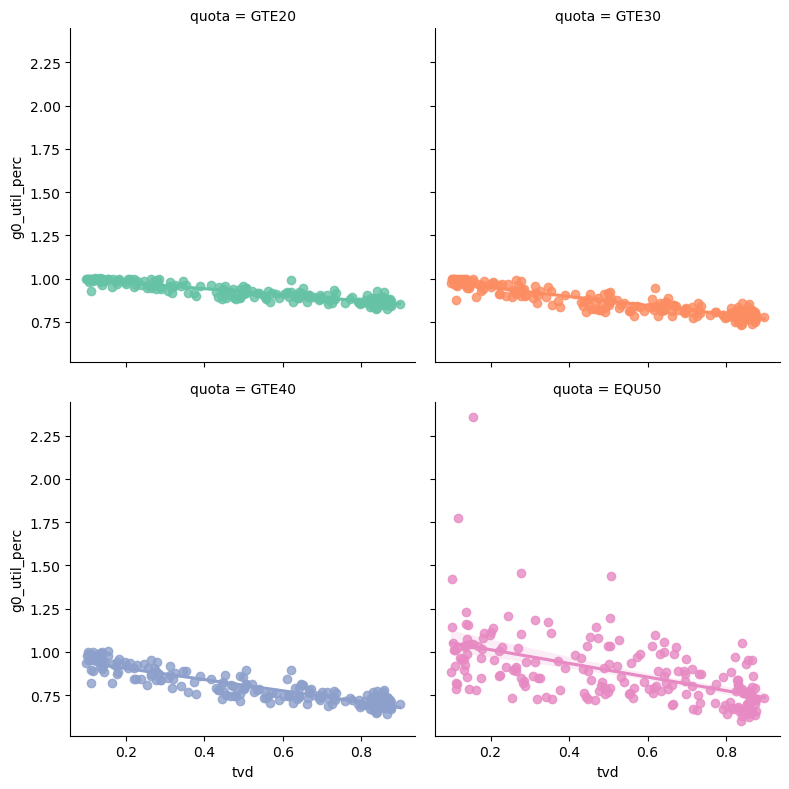

In [152]:
sns.lmplot(data=df.loc[df["quota"] != QuotaType.NONE.name], x="tvd", y="g0_util_perc", hue="quota", palette="Set2", height=4, col="quota", col_wrap=2, aspect=1)

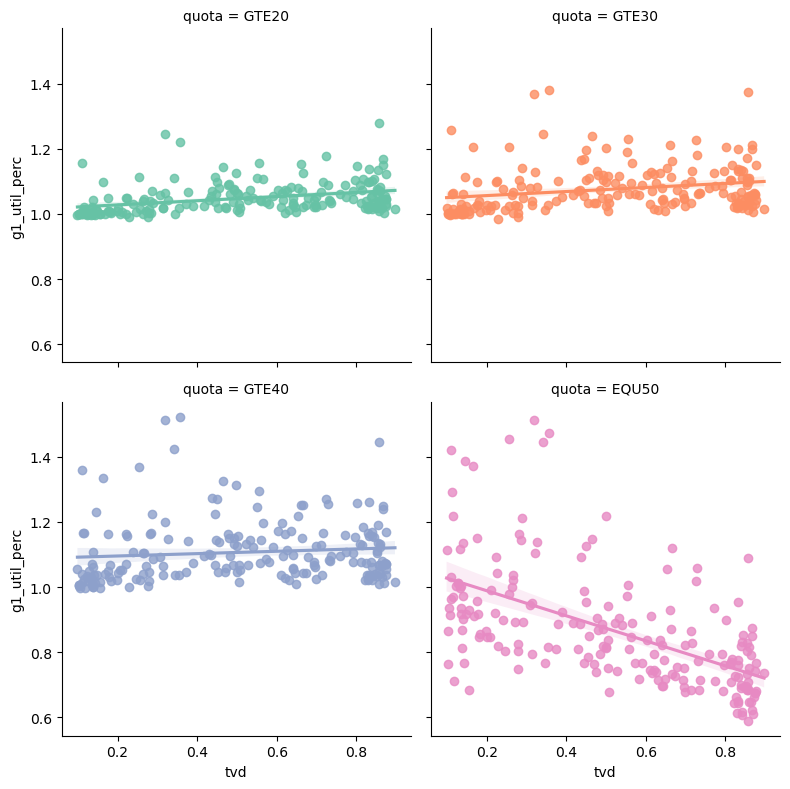

In [153]:
sns.lmplot(data=df.loc[df["quota"] != QuotaType.NONE.name], x="tvd", y="g1_util_perc", hue="quota", palette="Set2", height=4, col="quota", col_wrap=2, aspect=1)

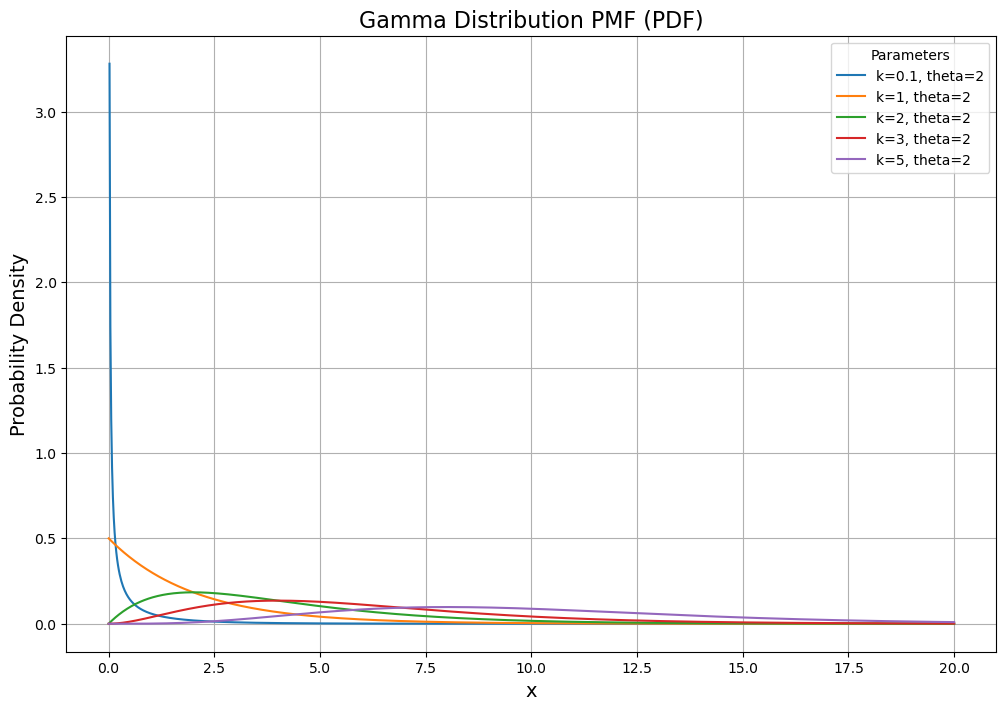

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Define the parameters for the Gamma distribution
shape_params = [0.1, 1, 2, 3, 5]  # Shape parameters (k)
scale_params = [2]  # Scale parameters (theta)

# Create a grid for the x values
x = np.linspace(0, 20, 1000)

# Initialize the plot
plt.figure(figsize=(12, 8))

# Loop through each combination of shape and scale parameters
for k in shape_params:
    for theta in scale_params:
        # Compute the PMF (or PDF, as PMF is typically for discrete)
        pmf_values = gamma.pdf(x, a=k, scale=theta)

        # Plot the values
        sns.lineplot(x=x, y=pmf_values, label=f"k={k}, theta={theta}")

# Customize the plot
plt.title("Gamma Distribution PMF (PDF)", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("Probability Density", fontsize=14)
plt.legend(title="Parameters")
plt.grid(True)

# Show the plot
plt.show()

<Axes: >

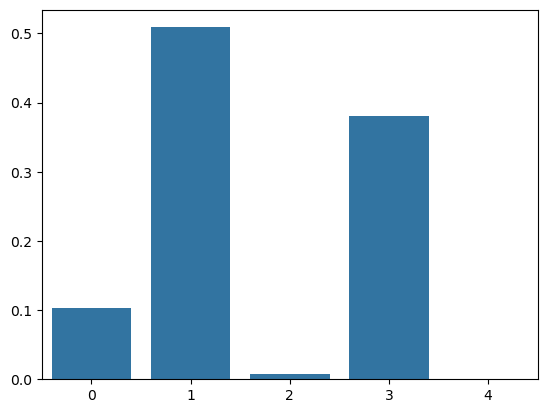

In [28]:
k = np.random.choice(len(simulations))
idx = np.random.choice(simulations[k].data.prefs.shape[0])
sns.barplot(simulations[k].data.prefs[idx])

In [107]:
stick_breaking(10, 10)

array([0.11407941, 0.32570107, 0.02767615, 0.00592941, 0.20433529,
       0.00076306, 0.0833997 , 0.12062375, 0.11582296, 0.0016692 ])